In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# retrieve US data jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

<Axes: ylabel='Frequency'>

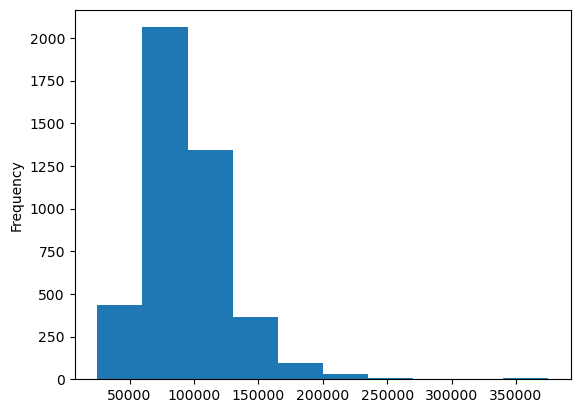

In [8]:
df_DA_US['salary_year_avg'].plot(kind = 'hist')

Text(0, 0.5, 'Number of Jobs')

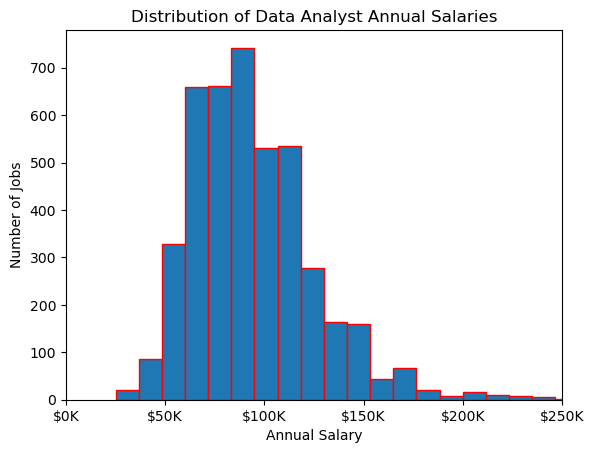

In [16]:
# bins allows you to decide to what capacity you want the data distributed
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 30, edgecolor = 'red')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst Annual Salaries')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Jobs')